In [37]:
# Import dependencies
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf # keras is a sub-library of tensorflow, since tensorflow 2.0
from tensorflow.keras.models import Sequential # for creating the architecture
from tensorflow.keras.layers import Dense, Flatten
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [38]:
# Read the data
traindf = pd.read_csv("dota2Train.csv", header = None)
testdf = pd.read_csv("dota2Test.csv", header = None)

In [39]:
# Checking the data
print(traindf.head())
print(traindf.dtypes)

   0    1    2    3    4    5    6    7    8    9    ...  107  108  109  110  \
0   -1  223    2    2    0    0    0    0    0    0  ...    0    0    0    0   
1    1  152    2    2    0    0    0    1    0   -1  ...    0    0    0    0   
2    1  131    2    2    0    0    0    1    0   -1  ...    0    0    0    0   
3    1  154    2    2    0    0    0    0    0    0  ...   -1    0    0    0   
4   -1  171    2    3    0    0    0    0    0   -1  ...    0    0    0    0   

   111  112  113  114  115  116  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 117 columns]
0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
112    int64
113    int64
114    int64
115    int64
116    int64
Length: 117, dtype: object


In [40]:
# Drop first three columns because ID and Gamemodes
traindf = traindf.drop(traindf.columns[[1, 2, 3]], axis=1)
testdf = testdf.drop(testdf.columns[[1, 2, 3]], axis=1)
traindf.head()

,0,4,5,6,7,8,9,10,11,12,...,107,108,109,110,111,112,113,114,115,116
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,-1,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,-1,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Reshaping the data to one hot encoding in training-data
winnerHeroes = traindf.drop(traindf.columns[[0]], axis=1).replace(-1,0)
looserHeroes = traindf.drop(traindf.columns[[0]], axis=1).replace(1,0) * -1
label = (traindf.iloc[:,0]+1)/2

# adding everything back together
traindf = pd.concat([label, winnerHeroes, looserHeroes], axis=1)
traindf.head()

,0,4,5,6,7,8,9,10,11,12,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Reshaping the data to one hot encoding in testing-data
winnerHeroes = testdf.drop(testdf.columns[[0]], axis=1).replace(-1,0)
looserHeroes = testdf.drop(testdf.columns[[0]], axis=1).replace(1,0) * -1
label = (testdf.iloc[:,0]+1)/2

# adding everything back together
testdf = pd.concat([label, winnerHeroes, looserHeroes], axis=1)
testdf.head()

,0,4,5,6,7,8,9,10,11,12,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Normalize output variable
# traindf = traindf / 2 + 0.5
# testdf = testdf / 2 + 0.5
# testdf.head()

,0,4,5,6,7,8,9,10,11,12,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,1.0,...,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,...,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.0,1.0,0.5,0.5,0.5,0.0,0.5,0.5,0.5,1.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,1.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,1.0,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.0,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [44]:
# Testing for duplicates
traindf.duplicated().sum()

0

In [45]:
# testing for duplicates without result-column
traindf.drop(traindf.columns[[0]], axis=1).duplicated().sum()

0

In [46]:
# Splitting in X and Y
traindf_numpy = traindf.to_numpy()
testdf_numpy = testdf.to_numpy()
y_train = traindf_numpy[:,0]
X_train = traindf_numpy[:,1:]
testnpa_y = testdf_numpy[:,0]
testnpa_X = testdf_numpy[:,1:]
print(X_train.shape)
print(y_train.shape)
print(testnpa_X.shape)
print(testnpa_y.shape)

(92650, 226)
(92650,)
(10294, 226)
(10294,)


In [47]:
splitpercentage = 0.5
X_validation, X_test, y_validation, y_test = train_test_split(testnpa_X, testnpa_y, test_size=splitpercentage)
print("X_validation: " + str(X_validation.shape))
print("X_test: " + str(X_test.shape))
print("y_validation: " + str(y_validation.shape))
print("y_test: " + str(y_test.shape))

X_validation: (5147, 226)
X_test: (5147, 226)
y_validation: (5147,)
y_test: (5147,)


In [48]:
# Create big model :)
model_big = tf.keras.models.Sequential()
input_shape = (226,)
model_big.add(Dense(300, input_shape=input_shape, activation="relu"))
model_big.add(Dense(200, activation="relu"))
model_big.add(Dense(100, activation="relu"))
model_big.add(Dense(50, activation="relu"))
model_big.add(Dense(25, activation="relu"))
model_big.add(Dense(1, activation="sigmoid"))

2022-10-15 12:40:42.960737: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
model_big.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               68100     
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 154,751
Trainable params: 154,751
Non-trai

In [50]:
# Compile the model
model_big.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [51]:
model_big.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_validation,y_validation))

Epoch 1/25
1448/1448 [==============================] - 5s 3ms/step - loss: 0.6909 - accuracy: 0.5264 - val_loss: 0.6886 - val_accuracy: 0.5467
Epoch 2/25
1448/1448 [==============================] - 4s 2ms/step - loss: 0.6878 - accuracy: 0.5420 - val_loss: 0.6844 - val_accuracy: 0.5609
Epoch 3/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6824 - accuracy: 0.5622 - val_loss: 0.6772 - val_accuracy: 0.5774
Epoch 4/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6752 - accuracy: 0.5783 - val_loss: 0.6705 - val_accuracy: 0.5864
Epoch 5/25
1448/1448 [==============================] - 4s 3ms/step - loss: 0.6691 - accuracy: 0.5908 - val_loss: 0.6662 - val_accuracy: 0.5901
Epoch 6/25
1448/1448 [==============================] - 4s 2ms/step - loss: 0.6651 - accuracy: 0.5961 - val_loss: 0.6639 - val_accuracy: 0.5970
Epoch 7/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6624 - accuracy: 0.6009 - val_loss: 0.6626 - val_accuracy:

In [52]:
# Create min model :)
model_small = tf.keras.models.Sequential()
input_shape = (226,)
model_small.add(Dense(200, input_shape=input_shape, activation="relu"))
model_small.add(Dense(100, activation="relu"))
model_small.add(Dense(50, activation="relu"))
model_small.add(Dense(1, activation="sigmoid"))
model_small.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               45400     
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 70,601
Trainable params: 70,601
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_small.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_small.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_validation,y_validation))

Epoch 1/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6908 - accuracy: 0.5279 - val_loss: 0.6874 - val_accuracy: 0.5426
Epoch 2/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6871 - accuracy: 0.5447 - val_loss: 0.6841 - val_accuracy: 0.5673
Epoch 3/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6819 - accuracy: 0.5661 - val_loss: 0.6783 - val_accuracy: 0.5799
Epoch 4/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6756 - accuracy: 0.5783 - val_loss: 0.6730 - val_accuracy: 0.5850
Epoch 5/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6703 - accuracy: 0.5873 - val_loss: 0.6689 - val_accuracy: 0.5922
Epoch 6/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6668 - accuracy: 0.5935 - val_loss: 0.6664 - val_accuracy: 0.5935
Epoch 7/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6644 - accuracy: 0.5968 - val_loss: 0.6649 - val_accuracy:

In [56]:
model_min = tf.keras.models.Sequential()
input_shape = (226,)
model_min.add(Dense(226, input_shape=input_shape, activation="relu"))
model_min.add(Dense(1, activation="sigmoid"))
model_min.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 226)               51302     
                                                                 
 dense_13 (Dense)            (None, 1)                 227       
                                                                 
Total params: 51,529
Trainable params: 51,529
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_min.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_min.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_validation,y_validation))

Epoch 1/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6897 - accuracy: 0.5344 - val_loss: 0.6852 - val_accuracy: 0.5578
Epoch 2/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6827 - accuracy: 0.5590 - val_loss: 0.6795 - val_accuracy: 0.5730
Epoch 3/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6775 - accuracy: 0.5733 - val_loss: 0.6751 - val_accuracy: 0.5782
Epoch 4/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6734 - accuracy: 0.5823 - val_loss: 0.6715 - val_accuracy: 0.5836
Epoch 5/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6702 - accuracy: 0.5879 - val_loss: 0.6691 - val_accuracy: 0.5899
Epoch 6/25
1448/1448 [==============================] - 2s 2ms/step - loss: 0.6677 - accuracy: 0.5927 - val_loss: 0.6668 - val_accuracy: 0.5930
Epoch 7/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6658 - accuracy: 0.5960 - val_loss: 0.6659 - val_accuracy:

In [12]:
model_empty = tf.keras.models.Sequential()
input_shape = (113,)
model_empty.add(Dense(1, input_shape=input_shape, activation="sigmoid"))
model_empty.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_empty.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_validation,y_validation))

Epoch 1/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6904 - accuracy: 0.5348 - val_loss: 0.6863 - val_accuracy: 0.5440
Epoch 2/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6856 - accuracy: 0.5490 - val_loss: 0.6824 - val_accuracy: 0.5605
Epoch 3/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6822 - accuracy: 0.5605 - val_loss: 0.6794 - val_accuracy: 0.5656
Epoch 4/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6795 - accuracy: 0.5675 - val_loss: 0.6771 - val_accuracy: 0.5733
Epoch 5/25
1448/1448 [==============================] - 3s 2ms/step - loss: 0.6773 - accuracy: 0.5732 - val_loss: 0.6753 - val_accuracy: 0.5761
Epoch 6/25
1448/1448 [==============================] - 2s 2ms/step - loss: 0.6754 - accuracy: 0.5794 - val_loss: 0.6740 - val_accuracy: 0.5747
Epoch 7/25
1448/1448 [==============================] - 2s 1ms/step - loss: 0.6740 - accuracy: 0.5821 - val_loss: 0.6733 - val_accuracy:

In [ ]:
# evaluate the model
# model_big.evaluate(X_test, y_test)

In [79]:
output = model_big.predict(X_test)
print("Output shape:")
print(output.shape)
print("Output first 10 values:")
print(output[0:10])
print("Labels first 10 values:")
print(y_test[0:10])

161/161 [==============================] - 0s 3ms/step
Output shape:
(5147, 1)
Output first 10 values:
[[0.50237054]
 [0.39222476]
 [0.5917103 ]
 [0.54825246]
 [0.50822824]
 [0.54917604]
 [0.3957027 ]
 [0.5119542 ]
 [0.4346228 ]
 [0.6949138 ]]
Labels first 10 values:
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]


In [82]:
flatRoundOutput = output.flatten().round()
flatRoundOutput

array([1., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [86]:
confmatrix = confusion_matrix(y_test, flatRoundOutput)
print(confmatrix)

[[1506  892]
 [1269 1480]]


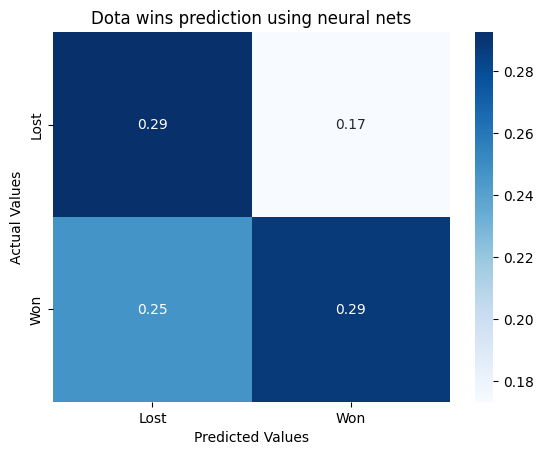

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(confmatrix/confmatrix.sum(), annot=True, cmap='Blues')

ax.set_title('Dota wins prediction using neural nets')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

# Labels per value
ax.xaxis.set_ticklabels(['Lost','Won'])
ax.yaxis.set_ticklabels(['Lost','Won'])

plt.show()